In [2]:
import pandas as pd

# Load the xsv file (assuming it's a CSV file for this example)
df = pd.read_csv('BankChurners.csv', delimiter=',')  # Adjust the delimiter if necessary

# Print the title of each column
for column in df.columns:
    print(column)

CLIENTNUM
Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1
Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2


In [3]:
num_samples = len(df)
print(num_samples)

10127


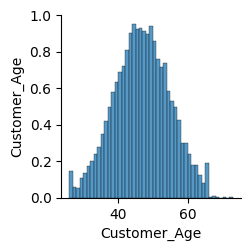

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select specific columns (change 'feature1', 'feature2', etc., to the names of your features)
selected_features = ['Customer_Age']
selected_df = df[selected_features]

# Create a pairplot
sns.pairplot(selected_df, height=2.5)

# Show the plot
plt.show()


In [5]:


# Check for NaN values
if df.isnull().values.any():
    print("There are NaN values in the dataset.")
else:
    print("No NaN values in the dataset.")



No NaN values in the dataset.


1-4

In [6]:
nan_info = df.isnull().sum()
print("Columns with NaN values:")
print(nan_info[nan_info > 0])


Columns with NaN values:
Series([], dtype: int64)


1-5

In [7]:
classes = df["Attrition_Flag"].unique()
print(classes)


['Existing Customer' 'Attrited Customer']


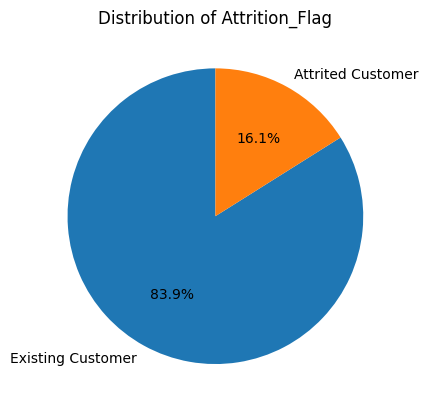

<Figure size 640x480 with 0 Axes>

In [8]:

data_counts = df["Attrition_Flag"].value_counts()
data_counts.plot(kind="pie", autopct='%1.1f%%', startangle=90)
plt.title("Distribution of Attrition_Flag")
plt.ylabel("")
plt.show()
plt.savefig("img/pie_photo")


In [9]:
print(df["Attrition_Flag"].value_counts())


Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
